# Linear equations

In [7]:
import pandas as pd
import numpy as np

from algorithms import gauss_seidel
from algorithms import gauss_jacobi
from algorithms import forward_substitution
from algorithms import backward_substitution
from algorithms import solve

from plots import plot_operation_count
from plots import plot_ill_problem_2
from plots import plot_iterative_convergence

from problems import get_ill_problem_1
from problems import get_ill_problem_2
from problems import get_inverse_demand_problem


import time

# how come using autformatting?
np.set_printoptions(precision=4)
# also for Pandas

## Special cases

We can start with some special cases to develop the basic building blocks for more complicated material

In [8]:
A = np.identity(3)
b = np.random.normal(size=3)

x = forward_substitution(A, b)
x = backward_substitution(A, b)
x, b

(array([-1.3267, -0.8319, -1.0784]), array([-1.3267, -0.8319, -1.0784]))

## L-U Factorization







Adding to this the two building blocks we developed earlier `forward_substitution` and `backward_substitution`, we can now write a quite generic function to solve systems of linear equations.

In [15]:
A = np.array([[3, 1], [1, 2]])
b = np.array([9, 8])

x = solve(A, b)
# Test that correct.
np.allclose(np.dot(A, x), b)

False

Building your own numerical routines is usually the only way to really understand the algorithms and learn about all the potential pitfalls. However, the default should be to rely on battle-tested production code. For linear algebra there are numerous well established libraries available.

How does solving a system of linear equations compare to other alternative?

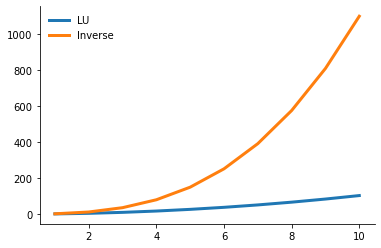

In [4]:
plot_operation_count()

The right setup for your numerical needs depends on your particular problem. For example, this trade-off looks very different if you have to solve numerous linear equations that only differ in $b$ but not $A$. 

In [5]:
def tic():
    return time.time()


def toc(t):
    return time.time() - t


print(
    "{:^5} {:^5}   {:^11} {:^11} \n{}".format(
        "m", "n", "np.solve(A,b)", "dot(inv(A), b)", "-" * 40
    )
)

for m in [1, 100]:
    for n in [50, 500]:
        A = np.random.rand(n, n)
        b = np.random.rand(n, 1)

        tt = tic()
        for j in range(m):
            x = np.linalg.solve(A, b)

        f1 = 100 * toc(tt)

        tt = tic()
        Ainv = np.linalg.inv(A)
        for j in range(m):
            x = np.dot(Ainv, b)

        f2 = 100 * toc(tt)
        print(" {:3}   {:3} {:11.2f} {:11.2f}".format(m, n, f1, f2))

  m     n     np.solve(A,b) dot(inv(A), b) 
----------------------------------------
   1    50        7.05        4.85
   1   500      106.61      117.80
 100    50       11.74        0.07
 100   500     9031.62       87.34


## Gaussian elimination

code in file, give reference and then move on.


## Rounding error

##  ill conditioned

In [6]:
grid = [5, 10, 15]
cond = np.tile(np.nan, len(grid))
err = np.tile(np.nan, len(grid))
for i, n in enumerate(grid):
    A, b, x_true = get_ill_problem_1(n)
    x_solve = np.linalg.solve(A, b)
    cond[i] = np.linalg.cond(A)
    err[i] = np.linalg.norm(x_solve - x_true, 1)

In [7]:
df = pd.DataFrame(columns=["Condition", "Error", "Dimension"])

df["Dimension"] = grid
df["Condition"] = err
df["Error"] = cond

In [8]:
df

,Condition,Error,Dimension
0,6.664669e-13,2.616969e+04,5
1,1.806119e-06,2.106258e+12,10
2,4.054513e+01,2.582410e+21,15


In [9]:
grid = np.linspace(0.9, 1.1)
cond, err = list(), list()
for p in grid:
    A, b, x_true = get_ill_problem_2(p)
    x_solve = np.linalg.solve(A, b)

    cond.append(np.linalg.cond(A))
    err.append(np.linalg.norm(x_solve - x_true, 1))

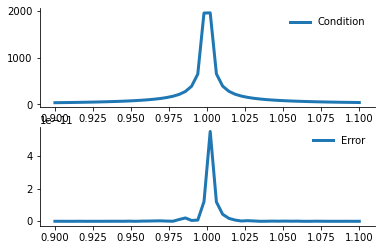

In [10]:
plot_ill_problem_2(cond, err, grid)

## Iterative methods


In [11]:
A, b, x_true = get_inverse_demand_problem()

### Gauss Jacobi

In [12]:
x_solve, conv_gj = gauss_jacobi(A, b)

In [13]:
x_solve, x_true

(array([6., 4.]), array([6., 4.]))

### Gauss Seidel

In [14]:
x_solve, conv_gs = gauss_seidel(A, b)

We can now compare the two methods.

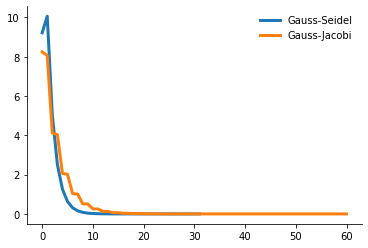

In [15]:
plot_iterative_convergence(conv_gs, conv_gj)

----

In [37]:
from scipy.linalg import lu

b = np.array([10, 8, -3]).T
A = np.array([[-3, 2, 3], [-3, 2, 1], [3, 0, 0]])


_, l, u = lu(A)

y = forward_substitution(l, b)
x = backward_substitution(u, y)

print(l)
print(u)
print(y)
print(x)

[[ 1.  0.  0.]
 [-1.  1.  0.]
 [ 1.  0.  1.]]
[[-3.  2.  3.]
 [ 0.  2.  3.]
 [ 0.  0. -2.]]
[ 10.  18. -13.]
[ 2.6667 -0.75    6.5   ]
